In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import torchaudio
import pandas as pd
import numpy as np

In [50]:
import sys, os
import torch
import librosa
import numpy as np
import pandas as pd
from torch import Tensor
from scipy.io import wavfile
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset


class Freesound(Dataset):
    def __init__(self, transform=None, mode="train"):
        # setting directories for data
        data_root = "../input"
        self.mode = mode
        if self.mode is "train":
            self.data_dir = os.path.join(data_root, "audio_train")
            self.csv_file = pd.read_csv(os.path.join(data_root, "train.csv"))
        elif self.mode is "test":
            self.data_dir = os.path.join(data_root, "audio_test")
            self.csv_file = pd.read_csv(os.path.join(data_root, "sample_submission.csv"))

        # dict for mapping class names into indices. can be obtained by 
        # {cls_name:i for i, cls_name in enumerate(csv_file["label"].unique())}
        self.classes = {'Acoustic_guitar': 38, 'Applause': 37, 'Bark': 19, 'Bass_drum': 21, 'Burping_or_eructation': 28, 'Bus': 22, 'Cello': 4, 'Chime': 20, 'Clarinet': 7,'Computer_keyboard': 8, 'Cough': 17, 'Cowbell': 33, 'Double_bass': 29, 'Drawer_open_or_close': 36, 'Electric_piano': 34, 'Fart': 14, 'Finger_snapping': 40, 'Fireworks': 31, 'Flute': 16, 'Glockenspiel': 3, 'Gong': 26, 'Gunshot_or_gunfire': 6, 'Harmonica': 25, 'Hi-hat': 0, 'Keys_jangling': 9, 'Knock': 5, 'Laughter': 12, 'Meow': 35, 'Microwave_oven': 27, 'Oboe': 15, 'Saxophone': 1, 'Scissors': 24, 'Shatter': 30, 'Snare_drum': 10, 'Squeak': 23, 'Tambourine': 32, 'Tearing': 13, 'Telephone': 18, 'Trumpet': 2, 'Violin_or_fiddle': 39,  'Writing': 11}

        self.transform = transform
        
    def __len__(self):
        return self.csv_file.shape[0] 

    def __getitem__(self, idx):
        filename = self.csv_file["fname"][idx]
        
        rate, data = wavfile.read(os.path.join(self.data_dir, filename))

        if self.transform is not None:
            data = self.transform(data)

        if self.mode is "train":
            label = self.classes[self.csv_file["label"][idx]]
            return data, label

        elif self.mode is "test":
            return data


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    tsfm = transforms.Compose([
        lambda x: x.astype(np.float32) / np.max(x), # rescale to -1 to 1
        lambda x: librosa.feature.mfcc(x, sr=44100, n_mfcc=40), # MFCC 
        lambda x: Tensor(x)
        ])

    # todo: multiprocessing, padding data
    dataloader = DataLoader(
        Freesound(transform=tsfm, mode="train"), 
        batch_size=1,
        shuffle=True, 
        num_workers=0)

    for index, (data, label) in enumerate(dataloader):
        print(label.numpy())
        print(data.shape)
        plt.imshow(data.numpy()[0, :, :])
        plt.show()

        if index == 0:
            break

FileNotFoundError: [Errno 2] File b'../input/train.csv' does not exist: b'../input/train.csv'

In [47]:
base_dir = 'data/wav'
list_IDs = ['/id10009/7hpSiT9_gCE/00001',
        '/id10009/aFttHpeaXaQ/00001',
        '/id10009/AtavJVP4bCk/00001',
        '/id10009/AtavJVP4bCk/00002',
        '/id10009/AtavJVP4bCk/00003',
        '/id10009/AtavJVP4bCk/00004',
        '/id10009/AtavJVP4bCk/00005',
        '/id10009/AtavJVP4bCk/00006',
        '/id10009/AtavJVP4bCk/00007',
        '/id10009/AtavJVP4bCk/00008',
        ]

Shape of waveform: torch.Size([1, 100481])
Sample rate of waveform: 16000


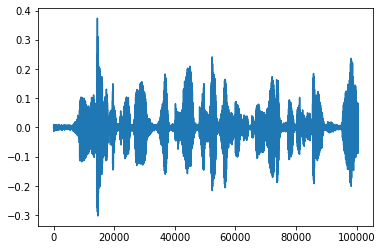

In [48]:
filename = "data/wav/id10009/7hpSiT9_gCE/00001.wav"
waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())